# Unit 5 - Financial Planning

In [36]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [37]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [38]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [39]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [40]:
# Fetch current BTC price
btc_url = btc_url + "?format=json"
# Execute get request
requests.get(btc_url)
# Execute GET requests and store response
response_btc_data = requests.get(btc_url)

# Fetch current ETH price
eth_url = eth_url + "?format=json"
# Execute get request
requests.get(eth_url)
# Execute GET requests and store response
response_eth_data = requests.get(eth_url)


# Compute current value of my crypto

# Formatting as JSON
response_btc_data = response_btc_data.json()
response_eth_data = response_eth_data.json()

# Retrieving data from URL to get price 
btc_current_value = response_btc_data['data']['1']['quotes']['USD']['price']
eth_current_value = response_eth_data['data']['1027']['quotes']['USD']['price']

# Getting current value 
my_btc_value= my_btc * btc_current_value
my_eth_value= my_eth * eth_current_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $51675.60
The current value of your 5.3 ETH is $11859.07


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [41]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [42]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_KEY")
alpaca_secret_key = os.getenv("SECRET")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key, api_version= 'v2')

In [43]:
# Format current date as ISO format
today = pd.Timestamp("2023-12-15", tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start=today,
    end=today
).df

# Reorganize the DataFrame

# Seperate ticker data
AGG = df_portfolio[df_portfolio['symbol'] == 'AGG'].drop('symbol',axis =1)
SPY = df_portfolio[df_portfolio['symbol'] == 'SPY'].drop('symbol',axis =1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG,SPY],axis=1,keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                            \
                           close   high    low trade_count  open    volume   
timestamp                                                                    
2023-12-15 05:00:00+00:00  98.69  98.88  98.59       37771  98.8  10079203   

                                         SPY                               \
                                vwap   close   high       low trade_count   
timestamp                                                                   
2023-12-15 05:00:00+00:00  98.733271  469.33  470.7  467.4263      667849   

                                                         
                             open     volume       vwap  
timestamp                                                
2023-12-15 05:00:00+00:00  469.49  141529826  469.34935

In [44]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.69
Current SPY closing price: $469.33


In [45]:
# Compute the current value of shares
my_spy_value = my_agg*agg_close_price
my_agg_value = my_spy*spy_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19738.00
The current value of your 200 AGG shares is $23466.50


### Savings Health Analysis

In [46]:
# Set variables 
crypto_values = my_btc_value+my_eth_value
shares_values = my_agg_value+my_spy_value

# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
monthly_data = {
    "crypto" : [crypto_values],
    "shares" : [shares_values]
}

# Create savings DataFrame
savings_data = pd.DataFrame(monthly_data, index=["amount"]).T

# Display savings DataFrame
display(savings_data)

,amount
crypto,63534.668
shares,43204.500


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

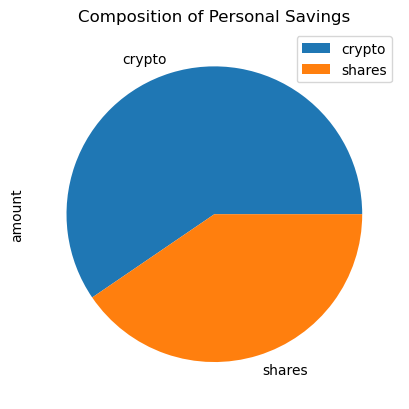

In [47]:
# Plot savings pie chart
savings_data.plot.pie(y="amount", title = "Composition of Personal Savings")

In [48]:
# Set ideal emergency fund

emergency_fund_value = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_values+shares_values

# Validate saving health
if total_savings>emergency_fund_value:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings<emergency_fund_value:
    print("You do not have enough funds to reach your financial goal")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [49]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [50]:
# Set the tickers
ticker = ["AGG","SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
ticker,
timeframe,
start = start_date,
end=end_date

).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol',axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol',axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG,SPY],axis=1,keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2016-05-02 04:00:00+00:00  3608552  110.626939  207.9700  208.18  206.41   
2016-05-03 04:00:00+00:00  3128774  110.864495  206.1592  206.80  205.28   
2016-05-04 04:00:00+00:00  3096337  110.877983  205.0100  205.85  204.42   
2016-05-05 04:00:00+00:00  3052967  111.030002  204.9700  205.98  204.47   
2016-05-06 04:00:00+00:00  2922700  111.027631  205.7200  205.77  203.88   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00      263586  206.92   64747229  207.305695  
2016-05-03 04:00:00+00:00      377523  206.52  108050343  206.309997  
2016-05-04 04:00:00+00:00      345266  204.99   94995641  205.086315  
2016-05-05 04:00:00+00:00      280626  205.56   68425268  205.140615  
2016-05-06 04:00:00+00:00      340162  204.06   90999800  204.943796

In [51]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation=500,
    num_trading_days= 252*30
)

In [52]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-05-02 04:00:00+00:00  3608552  110.626939          NaN  207.9700  208.18   
2016-05-03 04:00:00+00:00  3128774  110.864495     0.001853  206.1592  206.80   
2016-05-04 04:00:00+00:00  3096337  110.877983     0.000451  205.0100  205.85   
2016-05-05 04:00:00+00:00  3052967  111.030002     0.002526  204.9700  205.98   
2016-05-06 04:00:00+00:00  2922700  111.027631    -0.001530  205.7200  205.77   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  206.41      263586  206.92   64747229  207.305695   
2016-05-03 04:00:00+00:00  205.28      377523  206.52  108050343  206.309997   
2016-05-04 04:00:00+00:00  204.42      345266  204.99   94995641  205.086315   
2016-05-05 04:00:00+00:00  204.47      280626  205.56   68425268  205.140615   
2016-05-06 04:00:00+00:00  203.88      340162  204.06   90999800  204.943796   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00    -0.008707  
2016-05-04 04:00:00+00:00    -0.005574  
2016-05-05 04:00:00+00:00    -0.000195  
2016-05-06 04:00:00+00:00     0.003659

In [53]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 110.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 120.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 130.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 140.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 150.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 160.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 170.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 180.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 190.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 200.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 210.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 220.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 230.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 240.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 250.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 260.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 270.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 280.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 290.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 300.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 310.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 320.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 330.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 340.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 350.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 360.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 370.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 380.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 390.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 400.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 410.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 420.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 430.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 440.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 450.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 460.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 470.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 480.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 490.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999231,0.995622,1.007150,0.997456,0.998027,1.001860,1.006094,0.997212,0.993873,0.997297,...,0.999909,1.009918,0.999612,0.999924,1.004610,1.000220,0.996698,0.994064,0.997280,1.002950
2,1.003924,0.988137,1.017974,1.001578,1.000711,0.997179,1.011123,0.999016,0.995248,0.999494,...,1.003038,1.007805,1.003559,1.003703,1.001808,1.001046,0.993536,1.007477,0.999479,0.999917
3,0.993853,0.989677,1.014779,1.001618,0.991806,0.997426,1.022802,0.995306,0.995583,0.999904,...,0.994916,1.004057,1.004772,1.002447,1.005166,1.012506,0.993768,0.997273,1.000799,1.006048
4,0.995902,0.997835,1.014727,0.995674,0.999189,1.003637,1.022895,1.001205,0.996280,0.997453,...,0.994276,1.009695,0.997629,1.004178,1.002187,1.014650,0.994140,0.995949,1.002271,1.001005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.128006,3.085657,5.231723,2.893379,8.000997,9.147619,2.047672,5.500551,6.744047,8.849493,...,14.489133,13.731764,5.949966,4.345931,8.339437,3.501656,8.808804,6.893075,13.392198,3.714517
7557,5.107225,3.080550,5.251260,2.904496,8.026980,9.174195,2.035430,5.507643,6.751059,8.886016,...,14.483084,13.744353,5.942676,4.343037,8.346713,3.493764,8.848242,6.906744,13.316746,3.746237
7558,5.089295,3.068039,5.223471,2.890072,8.104812,9.133264,2.038839,5.481480,6.729144,8.865018,...,14.432252,13.753477,6.001270,4.311121,8.289938,3.461489,8.874586,6.883821,13.331733,3.752326
7559,5.105816,3.075314,5.235590,2.894793,8.033921,9.166808,2.047343,5.476116,6.721052,8.846357,...,14.542029,13.857912,6.020680,4.300445,8.362414,3.440390,8.928806,6.938562,13.314351,3.753562


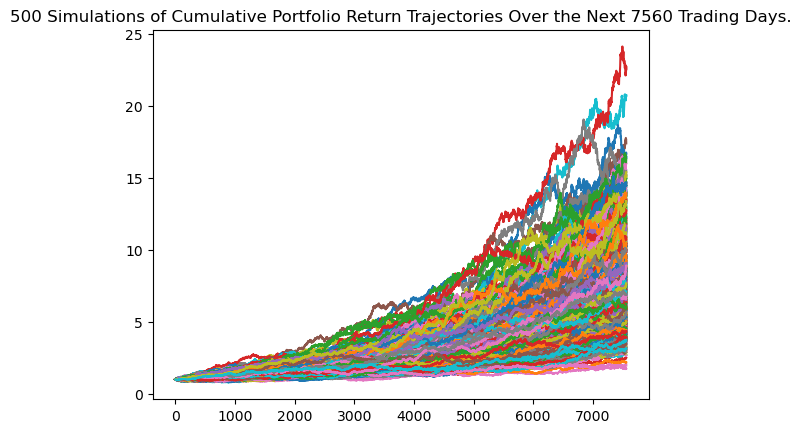

In [54]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

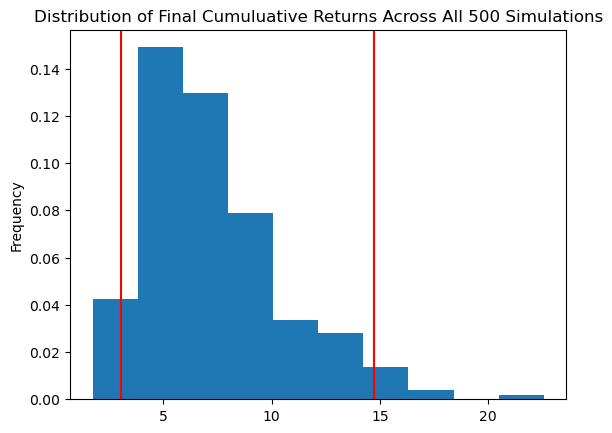

In [55]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [56]:
# Fetch summary statistics from the Monte Carlo simulation results
stat_sum = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(stat_sum)

count           500.000000
mean              7.305143
std               3.213689
min               1.754926
25%               4.881917
50%               6.638310
75%               8.872169
max              22.557925
95% CI Lower      3.052451
95% CI Upper     14.707092
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [57]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stat_sum[8]*initial_investment,2)
ci_upper = round(stat_sum[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $61049.03 and $294141.85


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [58]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(stat_sum[8]*initial_investment,2)
ci_upper = round(stat_sum[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $91573.54 and $441212.77


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [59]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation=500,
    num_trading_days= 252*5
)

In [60]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 120.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 130.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 140.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 150.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 180.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 210.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 220.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 230.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 240.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 270.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 280.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 290.

/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca


Running Monte Carlo simulation number 300.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 410.
Running Monte Carlo simulation number 420.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 430.
Running Monte Carlo simulation number 440.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 450.
Running Monte Carlo simulation number 460.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 470.
Running Monte Carlo simulation number 480.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 490.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002127,0.995760,1.003369,0.996997,0.999271,0.998079,0.997200,0.998625,0.995809,1.003251,...,1.004685,0.997159,1.006154,1.004573,0.994259,1.006561,1.003310,1.004330,1.002133,1.012527
2,1.001520,0.996426,0.993034,0.996525,1.001389,0.997273,0.997368,0.994022,0.994215,0.999122,...,1.009558,0.997017,0.999299,1.006015,1.000265,1.016992,0.994246,1.006211,0.998852,1.006122
3,0.996582,1.002425,1.002029,0.995968,0.993523,0.998426,0.999397,0.992940,0.983511,0.996196,...,1.006404,0.989417,1.001055,1.000750,1.002147,1.014599,0.993034,1.002187,0.994333,1.004334
4,0.995285,1.006776,1.007348,0.997981,0.996736,0.999096,0.996148,0.987794,0.980390,0.996497,...,1.011473,0.992902,0.994794,0.995279,1.000327,1.015149,0.998873,1.004709,1.003164,0.999998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.017265,1.270143,1.518082,1.147141,1.437577,1.471508,1.324650,1.948624,1.121773,1.250045,...,1.628008,1.299897,1.524894,1.466657,0.945110,1.139685,1.636558,1.381232,1.157885,1.307894
1257,1.017086,1.272241,1.520503,1.148194,1.451567,1.472784,1.318656,1.948480,1.116082,1.252655,...,1.637200,1.301930,1.525993,1.458772,0.937715,1.139743,1.637050,1.369664,1.152203,1.301794
1258,1.011688,1.266501,1.501666,1.140272,1.458489,1.478525,1.306095,1.961692,1.123436,1.252102,...,1.629887,1.305172,1.535036,1.444728,0.942054,1.136288,1.637104,1.368963,1.145177,1.306909
1259,1.017788,1.283023,1.503091,1.138306,1.457902,1.493087,1.309842,1.969576,1.125977,1.250980,...,1.621401,1.308821,1.524234,1.453344,0.936323,1.147405,1.644002,1.372616,1.142082,1.296931


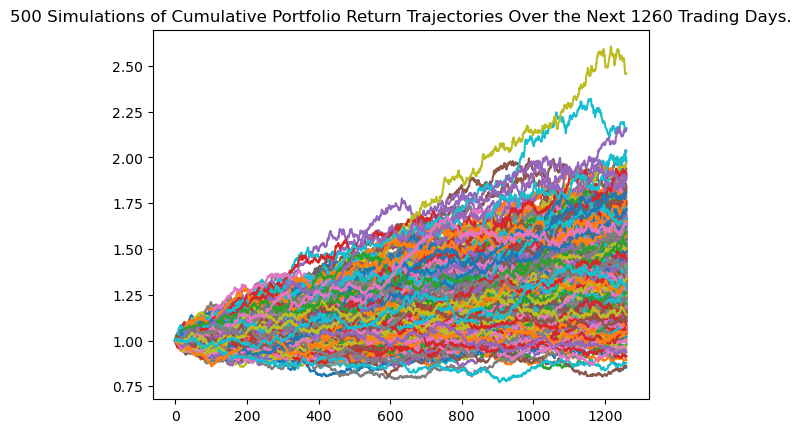

In [61]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

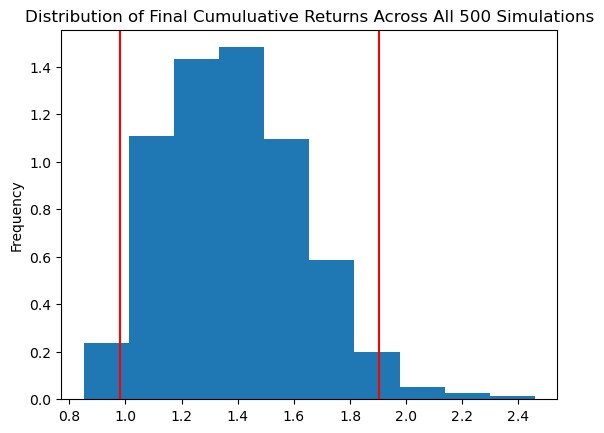

In [62]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [63]:
# Fetch summary statistics from the Monte Carlo simulation results
stat_sum = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(stat_sum)

count           500.000000
mean              1.385869
std               0.244241
min               0.851971
25%               1.198316
50%               1.369437
75%               1.537999
max               2.458663
95% CI Lower      0.979742
95% CI Upper      1.903895
Name: 1260, dtype: float64


In [64]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(stat_sum[8]*initial_investment,2)
ci_upper_five = round(stat_sum[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58784.5 and $114233.71


### Ten Years Retirement Option

In [65]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation=500,
    num_trading_days= 252*10
)

In [66]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 110.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 120.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 130.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 140.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 150.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 160.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 170.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 180.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 190.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 200.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 210.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 220.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 230.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 240.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 250.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 260.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 270.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 280.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 290.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 300.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 310.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 320.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 330.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 340.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 350.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 360.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 370.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 380.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 390.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 400.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 410.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 420.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 430.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 440.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 450.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 460.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 470.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 480.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

Running Monte Carlo simulation number 490.


/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/anvithachaluvadi/Documents/GW_FINTECH/HW/Financial-Planning_Module5Challenge/MCForeca

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994875,0.991889,0.998569,0.996686,0.993843,1.009181,1.007525,0.989746,0.995165,0.999828,...,1.007246,1.000869,1.005995,1.002143,0.998539,0.997895,1.001812,1.007965,0.996265,1.005016
2,0.993412,0.985670,0.997753,0.996228,0.986564,1.004891,1.002860,0.991163,0.995983,1.009987,...,1.001865,0.989113,1.008044,1.000367,0.995102,0.995330,1.006781,1.006383,1.008223,0.999050
3,0.997082,0.987606,0.988007,0.998976,0.991146,1.000257,1.003839,0.991797,0.996550,1.003654,...,0.999460,0.992252,1.016177,1.005275,0.995528,0.999011,1.009415,1.004583,1.012058,0.993479
4,0.999298,0.986000,0.986310,0.996220,0.992513,1.004829,1.007172,0.995614,0.992050,0.999152,...,0.994323,0.987600,1.021849,1.008842,1.001494,0.995450,1.019854,1.005451,1.010042,0.988957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.040499,1.741665,2.318471,1.557372,2.756538,1.959158,1.616464,1.265326,2.622611,1.674208,...,2.067925,2.761484,1.833099,1.588488,1.394171,1.985293,1.538656,2.172802,1.452800,2.197950
2517,1.042659,1.745858,2.330140,1.554053,2.763933,1.954384,1.616508,1.269945,2.599170,1.673773,...,2.056625,2.770611,1.841049,1.597099,1.381758,1.994460,1.533041,2.165298,1.454320,2.185391
2518,1.044315,1.745442,2.317141,1.561959,2.738008,1.958875,1.629367,1.271257,2.602048,1.670191,...,2.054921,2.770227,1.853268,1.601922,1.387218,1.999405,1.529047,2.178605,1.438326,2.181361
2519,1.047176,1.747452,2.334270,1.563796,2.754115,1.976193,1.621176,1.269420,2.597648,1.670345,...,2.048494,2.764137,1.857983,1.602336,1.393746,2.001619,1.529725,2.173443,1.436689,2.184400


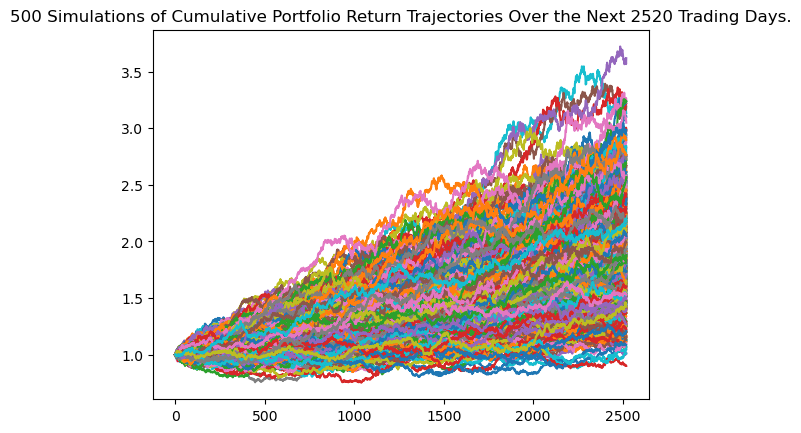

In [67]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()


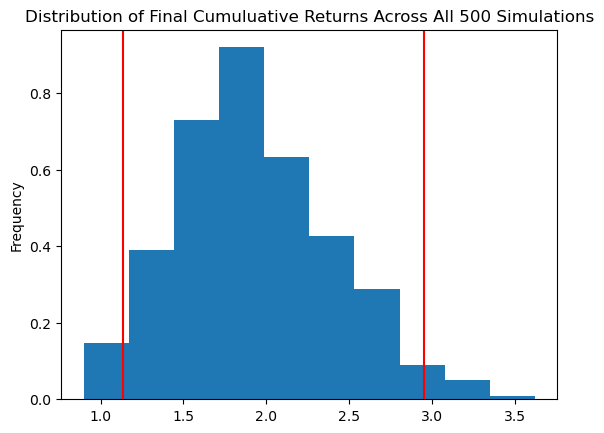

In [68]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
stat_sum = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(stat_sum)

count           500.000000
mean              1.929512
std               0.469749
min               0.899817
25%               1.598659
50%               1.864174
75%               2.224294
max               3.618720
95% CI Lower      1.136547
95% CI Upper      2.950055
Name: 2520, dtype: float64


In [70]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(stat_sum[8]*initial_investment,2)
ci_upper_ten = round(stat_sum[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $68192.81 and $177003.32
